## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Note

This is the first online data science competition I entered in.

## Data Loading and Initial Analysis

In [1]:
# load the necessary modules for the EDA stage
# for data analyis and wrangling pandas and numpy will do

import pandas as pd
import numpy as np

In [2]:
# load the training and test sets

train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# explore the first 10 columns of the training set

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# determine the data types and identify the features with missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Observations

1. There are missing values in the Age, Fare, Cabin, and Embarked columns of both the test and training sets. 
2. There are 12 and 11 columns for the training and test sets, respectively. 
3. Information could be gained from the Name column regarding the social status, gender, and possibly age of the passengers.

## Exploratory Data Analysis

In [7]:
# import the matplotlib and seaborn modules

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
%matplotlib inline

In [8]:
# determine the survival rate in the training set

train['Survived'].mean()

0.3838383838383838

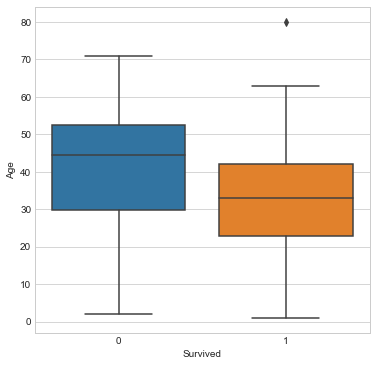

In [9]:
# the boxplot feature of seaborn is also useful to look at individual features
# explore the age distribution of those that survived and those that did not

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.boxplot(x="Survived", y="Age", data=train.dropna(),ax=ax)

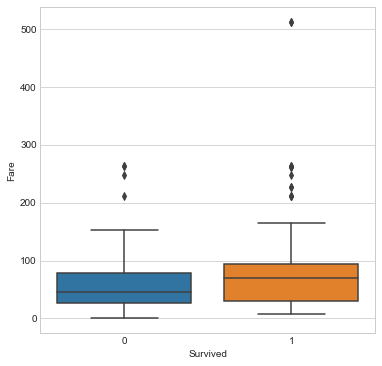

In [10]:
# explore the fare paid of those that survived vs. those that perished

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.boxplot(x="Survived", y="Fare", data=train.dropna(),ax=ax)

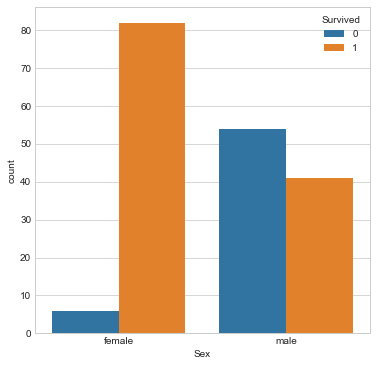

In [11]:
# plot the distribution according to gender between those who survived vs. those who drowned

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(x="Sex", hue="Survived",data=train.dropna(),ax=ax)

In [12]:
# transform the train set to look at relationship between survival and gender

train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


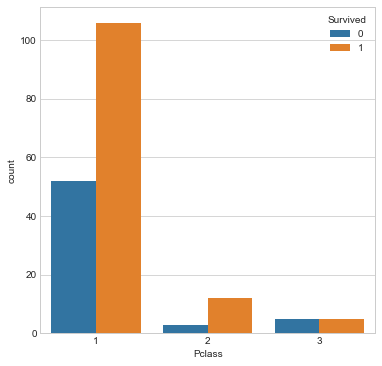

In [13]:
# explore the effect of passenger class on survival

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(x="Pclass", hue="Survived",data=train.dropna(),ax=ax)

In [14]:
# transform the train set to look at relationship between survival and passengger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


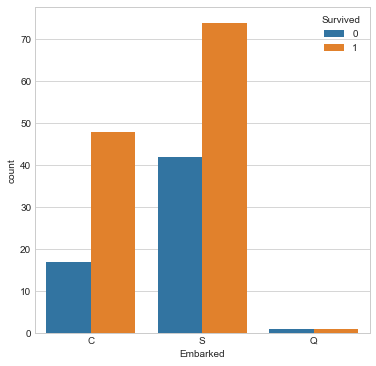

In [15]:
# look at the relationship between embarkation point and survival

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(x="Embarked", hue="Survived",data=train.dropna(),ax=ax)

In [16]:
# transform the train set to look at relationship between survival and embarkation point

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


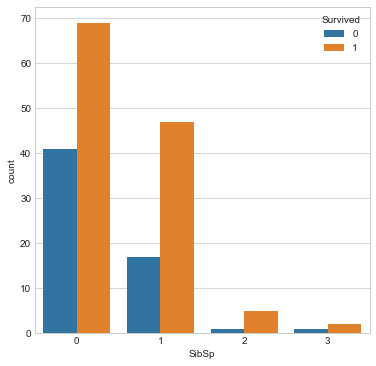

In [17]:
# see if having a sibling or a parent in the trip affect survival rate

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(x="SibSp", hue="Survived",data=train.dropna(),ax=ax)

In [18]:
# transform the train set to look at relationship between survival and having a sibling or a parent on the trip

train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Observations

1. Female are more likely to survive than males (4 to 1 ratio). 
2. Passengers in first class have high survival rate. They may have priority access during the evacuation.
3. Those that embarked from Cherbourg have a high survival rate. 
4. The training set survival rate is at 38%. 


## Data Preparation, Cleaning, and Feature Engineering

In [19]:
# combine the test and train set first for feature engineering, and imputation of missing values

train_dropped = train.drop('Survived', axis=1) # drop the Survived column from the training set to have equal number of column
combined = train_dropped.append(test)
combined.reset_index(inplace=True)
combined.drop('index', inplace=True, axis=1)

In [20]:
# change the sex column into one and zero values

combined['Sex']=combined['Sex'].map( {'male': 0, 'female': 1} , ).astype(int)

In [21]:
# create a function to extract the titles from the names

def strip_title(data):
    return data['Name'].split(',')[1].split('.')[0].strip()

combined['Titles'] = combined.apply(strip_title,axis=1)

In [22]:
# see if the function worked

combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
# see the titles that are stripped

combined['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [24]:
# as there are too many titles categorize the titles Officer, Royalty, Mrs, Miss, Master, and Mr.

Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }

combined['Category'] = combined['Titles'].map( Title_Dictionary , ).astype(str)

In [25]:
# we stripped the title and categorized them into categories in order to more accurately guess the missing values for age
# this is much better than simply using the mean, or median value

def age_filler(data):
    
    source = combined[['Age', 'Category']].groupby(['Category'], as_index=False).median().sort_values(by='Age', ascending=False)
    source = source.set_index('Category')
    
    if np.isnan(data['Age']) == True and data['Category'] == 'Officer':
        return source.loc['Officer']['Age']
    
    elif np.isnan(data['Age']) == True and data['Category'] == 'Royalty':
        return source.loc['Royalty']['Age']
    
    elif np.isnan(data['Age']) == True  and data['Category'] == 'Mrs':
        return source.loc['Mrs']['Age']
    
    elif np.isnan(data['Age']) == True  and data['Category'] == 'Mr':
        return source.loc['Mr']['Age']
    
    elif np.isnan(data['Age']) == True  and data['Category'] == 'Miss':
        return source.loc['Miss']['Age']
    
    elif np.isnan(data['Age']) == True  and data['Category'] == 'Master':
        return source.loc['Master']['Age']
    
    else:
        return data['Age']

combined['New_Age'] = combined.apply(age_filler,axis=1)

In [26]:
# use the mean to fill in the missing fare value

combined["Fare"].fillna(combined["Fare"].mean(), inplace=True)

In [27]:
# use the mode to fill in the missing embarked value

combined["Embarked"].fillna(max(combined["Embarked"].mode()), inplace=True)

In [28]:
# create a function to turn the fare into categorical values

a = combined.Fare.describe()

def fare_class(data):
    
    if data['Fare'] <= a['25%']:
        return 'Low Fare'
    
    elif data['Fare'] > a['25%'] and data['Fare'] <= a['75%']:
        return 'Middle Fare'
    
    else:
        return "High Fare"

combined['Fare_Category'] = combined.apply(fare_class,axis=1)

In [29]:
# create function to turn the age into categorical values
# here we are just classifying them as either young or old

def age_class(data):
    
    if data['New_Age'] <= 10:
        return 'Young'
    
    else:
        return "Old"

combined['Age_Category'] = combined.apply(age_class,axis=1)

In [30]:
# create a new column 'Alone' that determines if the passenger is traveling solo

def alone(data):
    
    if data['SibSp'] == 0 and data['Parch'] == 0:
        return 'Alone'  
    else:
        return 'With Companion'

combined['Alone'] = combined.apply(alone,axis=1)

In [31]:
# view the column names 

combined.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Titles', 'Category',
       'New_Age', 'Fare_Category', 'Age_Category', 'Alone'], dtype=object)

In [32]:
# convert the Fare_Category column into integers

combined['Fare_Category'] = combined['Fare_Category'].map( {'High Fare': 3, 'Middle Fare': 2, 'Low Fare': 1} , ).astype(int)

In [33]:
# convert the embarkation points into integers

combined['Embarked'] = combined['Embarked'].map( {'C': 3, 'Q': 2, 'S': 1} , ).astype(int)

In [34]:
# convert the Age_Category column into integers 
# BTW, converting them into integers makes it easier to engineer new columns later

combined['Age_Category'] = combined['Age_Category'].map( {'Young': 1, 'Old': 0, } , ).astype(int)

In [35]:
# convert the Alone column into integers

combined['Alone'] = combined['Alone'].map( {'With Companion': 1, 'Alone': 0, } , ).astype(int)

In [36]:
# drop the other columns that, I think, will now be irrelevant to our analysis


combined = combined.drop(['PassengerId','Cabin','Fare','Ticket','Name','Age','Cabin','Titles','New_Age'],axis=1)

In [37]:
# extract the training set from the combined dataframe, then join it with the Survived column from the original train set

train_final = combined.iloc[0:891]
survived = train['Survived']
train_final =train_final.join(survived)

In [38]:
# extract the test set

test_final = combined.iloc[891:]
test_final.reset_index(inplace=True)
test_final = test_final.drop('index', axis=1)

In [39]:
# view the new test set

test_final.head()

,Pclass,Sex,SibSp,Parch,Embarked,Category,Fare_Category,Age_Category,Alone
0,3,0,0,0,2,Mr,1,0,0
1,3,1,1,0,1,Mrs,1,0,1
2,2,0,0,0,2,Mr,2,0,0
3,3,0,0,0,1,Mr,2,0,0
4,3,1,1,1,1,Mrs,2,0,1


In [40]:
# view the new training set

train_final.head()

,Pclass,Sex,SibSp,Parch,Embarked,Category,Fare_Category,Age_Category,Alone,Survived
0,3,0,1,0,1,Mr,1,0,1,0
1,1,1,1,0,3,Mrs,3,0,1,1
2,3,1,0,0,1,Miss,2,0,0,1
3,1,1,1,0,1,Mrs,3,0,1,1
4,3,0,0,0,1,Mr,2,0,0,0


### Explore relationships between the new variables and survival rate

In [41]:
train_final[['Age_Category', 'Survived']].groupby(['Age_Category'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_Category,Survived
1,1,0.588235
0,0,0.366950


In [42]:
train_final[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Alone,Survived
1,1,0.505650
0,0,0.303538


In [43]:
train_final[['Fare_Category', 'Survived']].groupby(['Fare_Category'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare_Category,Survived
2,3,0.600000
1,2,0.373068
0,1,0.197309


In [44]:
train_final[['Category', 'Survived']].groupby(['Category'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Category,Survived
3,Mrs,0.795276
1,Miss,0.701087
5,Royalty,0.600000
0,Master,0.575000
4,Officer,0.277778
2,Mr,0.156673


### Prepate data for Machine Learning

In [45]:
# use get dummies to turn columns into categorical columns (just like one hot encoding)

train_final = pd.get_dummies(train_final, columns=['Fare_Category', 'Age_Category', 'Alone','Embarked','Sex','Pclass','Category'])
test_final = pd.get_dummies(test_final, columns=['Fare_Category', 'Age_Category', 'Alone','Embarked','Sex','Pclass','Category'])

In [46]:
# create the X_train, y_train, and X_test in preparation for machine learning

X_train = train_final.drop(['Survived',],axis=1)
y_train = train_final['Survived']
X_test = test_final
X_train.shape, y_train.shape, X_test.shape

((891, 23), (891,), (418, 23))

## Machine Learning

### Logistic Regression

In [47]:
# import the modules, build the classifier, train on the data, and make predictions

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

# populate the parameter grid

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l1','l2']}

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg,param_grid,cv=5)
grid_search.fit(X_train,y_train)

print('Training set score for logistic regression: {:.10f}'.format(grid_search.score(X_train,y_train)))
print('Best parameters: {}'.format(grid_search.best_params_))
print("--- %s seconds ---" % (time.time() - start_time))

Training set score for logistic regression: 0.8282828283
Best parameters: {'C': 1, 'penalty': 'l1'}
--- 0.747988224029541 seconds ---


In [48]:
# make a submission

y_pred = grid_search.predict(X_test)
submission= {'PassengerId': test['PassengerId'],'Survived':y_pred}
submission = pd.DataFrame(data=submission)
submission.set_index('PassengerId', inplace=True)
submission.to_csv('titanic_submission_logreg.csv')

#### Observations:

1. This submission scored 0.78468.
2. Logreg is easy to implement and returns a result immediately. 

### Support Vector Classification

In [49]:
# import the modules, build the classifier, train on the data, and make predictions

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

# populate the parameter grid
param_grid = {"gamma": [0.001, 0.01, 0.1, 1, 10, 100],
              "C" : [0.001, 0.01, 0.1, 1, 10, 100]}

clf = SVC()
grid_search = GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(X_train,y_train)

print('Training set score for SVC: {:.10f}'.format(grid_search.score(X_train,y_train)))
print('Best parameters: {}'.format(grid_search.best_params_))
print("--- %s seconds ---" % (time.time() - start_time))

Training set score for SVC: 0.8361391695
Best parameters: {'C': 1, 'gamma': 0.1}
--- 6.502362966537476 seconds ---


In [50]:
# make a submission 

y_pred = grid_search.predict(X_test)
submission= {'PassengerId': test['PassengerId'],'Survived':y_pred}
submission = pd.DataFrame(data=submission)
submission.set_index('PassengerId', inplace=True)
submission.to_csv('titanic_submission_svc.csv')

#### Observations

1. This scored 0.79425.

### Decision Tree Classifier

In [51]:
# import the modules, build the classifier, train on the data, and make predictions

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

# populate the parameter grid
param_grid = {"max_depth": list(range(1,10)),
              "max_features": list(range(1,15)),
              "min_samples_leaf": list(range(1,50)),
              "criterion": ["gini", "entropy"]}


clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(X_train,y_train)

print('Training set score for Decision Tree: {:.10f}'.format(grid_search.score(X_train,y_train)))
print('Best parameters: {}'.format(grid_search.best_params_))
print("--- %s seconds ---" % (time.time() - start_time))

Training set score for Decision Tree: 0.8327721661
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 3}
--- 125.22882199287415 seconds ---


In [52]:
# make a submission 

y_pred = grid_search.predict(X_test)
submission= {'PassengerId': test['PassengerId'],'Survived':y_pred}
submission = pd.DataFrame(data=submission)
submission.set_index('PassengerId', inplace=True)
submission.to_csv('titanic_submission_dtc.csv')

#### Observations

1. This scored 0.78947.

### Random Forest Classifier

In [53]:
# import the modules, build the classifier, train on the data, and make predictions

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

# populate the parameter grid

param_grid = param_grid = { "n_estimators"      : [250, 300],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [3, 5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(X_train,y_train)

print('Training set score for Random Forest: {:.10f}'.format(grid_search.score(X_train,y_train)))
print('Best parameters: {}'.format(grid_search.best_params_))
print("--- %s seconds ---" % (time.time() - start_time))

Training set score for Random Forest: 0.8653198653
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 250}
--- 99.58463597297668 seconds ---


In [54]:
# make a prediction

y_pred = grid_search.predict(X_test)
submission= {'PassengerId': test['PassengerId'],'Survived':y_pred}
submission = pd.DataFrame(data=submission)
submission.set_index('PassengerId', inplace=True)
submission.to_csv('titanic_submission_rfc.csv')

#### Observations

1. This scored 0.73684.
2. It seems that I overfitted the data. 

### K-Nearest Neighbor

In [55]:
# import the modules, build the classifier, train on the data, and make predictions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

# populate the parameter grid
param_grid = {'n_neighbors': list(range(1,11))}


clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(X_train,y_train)

print('Training set score for KNN: {:.10f}'.format(grid_search.score(X_train,y_train)))
print('Best parameters: {}'.format(grid_search.best_params_))
print("--- %s seconds ---" % (time.time() - start_time))

Training set score for KNN: 0.8439955107
Best parameters: {'n_neighbors': 5}
--- 0.7632434368133545 seconds ---


In [56]:
# make a submission

y_pred = grid_search.predict(X_test)
submission= {'PassengerId': test['PassengerId'],'Survived':y_pred}
submission = pd.DataFrame(data=submission)
submission.set_index('PassengerId', inplace=True)
submission.to_csv('titanic_submission_knn.csv')

#### Observations

1. This scored 0.75598.
2. Again a sign of overfitting.

### Voting Classifier

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()


log_clf = LogisticRegression(C=1, penalty ='l1')
rnd_clf = RandomForestClassifier(n_estimators=12)
svm_clf = SVC (C= 1, gamma = 0.1, probability = True)
dtc_clf =DecisionTreeClassifier( criterion = 'gini', max_depth = 9, max_features = 11, min_samples_leaf = 8)



voting_clf = VotingClassifier(
                estimators = [('lr', log_clf),('rf', rnd_clf),('svc',svm_clf),('dt',dtc_clf)],
                voting='soft')

voting_clf.fit(X_train,y_train)

print('Training set score for voting classifier is: {:.10f}'.format(voting_clf.score(X_train,y_train)))
print("--- %s seconds ---" % (time.time() - start_time))

Training set score for voting classifier is: 0.8451178451
--- 0.12879371643066406 seconds ---


In [58]:
y_pred = voting_clf.predict(X_test)
submission= {'PassengerId': test['PassengerId'],'Survived':y_pred}
submission = pd.DataFrame(data=submission)
submission.set_index('PassengerId', inplace=True)
submission.to_csv('titanic_submission_voting.csv')

#### Observation

1. This scored 0.79425.

### Bagging Classifier

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()

svm_clf = SVC (C= 100, gamma = 0.01, probability = True)

bag_clf = BaggingClassifier(svm_clf, n_estimators = 30000, max_samples = 100, bootstrap = True, n_jobs = -1, oob_score = True )
bag_clf.fit(X_train,y_train)

print('Training set score for bagging: {:.10f}'.format(bag_clf.score(X_train,y_train)))
print("--- %s seconds ---" % (time.time() - start_time))

Training set score for bagging: 0.8372615039
--- 106.38478326797485 seconds ---


In [60]:
y_pred = bag_clf.predict(X_test)
submission= {'PassengerId': test['PassengerId'],'Survived':y_pred}
submission = pd.DataFrame(data=submission)
submission.set_index('PassengerId', inplace=True)
submission.to_csv('titanic_submission_bagging.csv')

In [61]:
# explore the confusion matrix for bagging classifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score

print (confusion_matrix(y_train,bag_clf.predict(X_train)))
print ('The recall score for bagging: {:.10f}'.format(recall_score(y_train, bag_clf.predict(X_train))))
print ('The precision score for bagging: {:.10f}'.format(precision_score(y_train, bag_clf.predict(X_train))))

[[496  53]
 [ 92 250]]
The recall score for bagging: 0.7309941520
The precision score for bagging: 0.8250825083


#### Observation

1. This gave the best score of 0.79904. 
2. The confusion matrix is a 2x2 matrix showing the following:<br/>
    true negative|false negative<br/>
    false positive|true positive

### Conclusions

1. The Titanic dataset is a good starting point when learning about machine learning. 
2. You can practice data preparation, feature extraction, and explore relationships between attributes. 
3. The score from various ML algorithm is respectable. However, it is not good enough to land in the top 10% of the public leader board. 
4. Obviously, some feature engineering is needed, which I skipped for now. 
6. The best result obtained from the best ML algorithm (bagging classifier using SVM) was 0.79904. 

### END